<a href="https://colab.research.google.com/github/1aidea/cs480student/blob/main/Assignment04/Copy_of_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

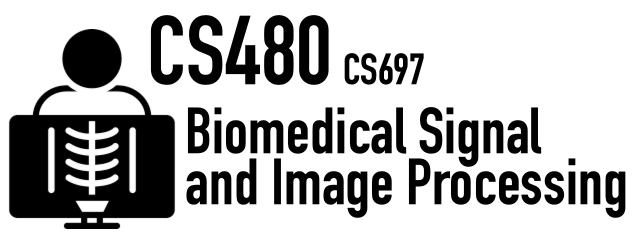
#Assignment 4

In [11]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7 MB 22.4 MB/s 


In [13]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [14]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [15]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [16]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [17]:
# TODO: Please display this image and print the dimensions!

In [18]:
# TODO: YOUR CODE

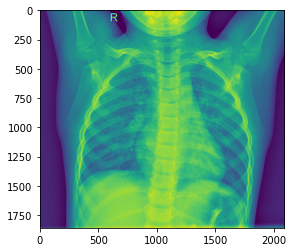

(1858, 2090)


In [19]:
imshow(img)
show()
print(img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [20]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [21]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [22]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER
"""
 The first operation we're doing is converting the images into greyscale, the reason
 behind this is because working with RGB images does not have much benefit
 when compared to working with greyscale images. Such is the case with edge detection
 where most images are in greyscale as there is little information loss.
"""

# TODO: Operation 2) YOUR ANSWER
"""
The second operation is compressing/resizing the image. The reason as to why this is
done is so that areas with pneumonia become more visable as dark spots on the image
as the resize function highlights areas with closely clumped dark spots. You can see 
an example of this in the images below, how after resizing the normal images you
can still see the ribs clearly, but the ribs in the pneumonia images are less pronounced.
"""


'\nThe second operation is compressing/resizing the image. The reason as to why this is\ndone is so that areas with pneumonia become more visable as dark spots on the image\nas the resize function highlights areas with closely clumped dark spots. You can see \nan example of this in the images below, how after resizing the normal images you\ncan still see the ribs clearly, but the ribs in the pneumonia images are less pronounced.\n'

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
# TODO: YOUR CODE

<Figure size 432x288 with 0 Axes>

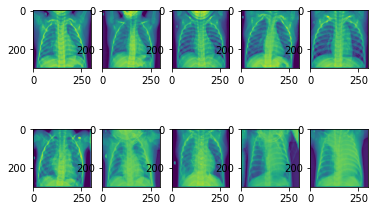

In [23]:
plt.figure()
f, axarr = plt.subplots(2,5)
for i in range(2):
  for j in range(5):
    if i == 0:
      axarr[i][j].imshow(normal_images[j])
    else:
      axarr[i][j].imshow(pneumonia_images[j])

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [24]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [25]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.zeros(TRAINING_COUNT * 2, dtype=np.int8)
training_target[TRAINING_COUNT:TRAINING_COUNT * 2] = 1

In [26]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [27]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.zeros(TESTING_COUNT * 2, dtype=np.int8)
testing_target[TESTING_COUNT:TESTING_COUNT * 2] = 1

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [28]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [29]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [31]:
"""
Random Forest classifier works by creating many decision trees based off subsets
of randomly chosen features from selected samples. Since decision trees are 
very sensitive to the data this is why we create many decision trees, thus the
name randomforest. when predicting a sample we pass the sample through all the
decision trees and get the most predicted value from all the trees as our result.
"""

'\nRandom Forest classifier works by creating many decision trees based off subsets\nof randomly chosen features from selected samples. Since decision trees are \nvery sensitive to the data this is why we create many decision trees, thus the\nname randomforest. when predicting a sample we pass the sample through all the\ndecision trees and get the most predicted value from all the trees as our result.\n'

In [35]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.925

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [36]:
"""
Yes this classification is very good as it has an average of over 90%.
I have mainly focused on Neural networks so I am suprised that the 
randomforestclassifer was able to get such good results without using things
such as CNN for image classification.
"""

'\nYes this classification is very good as it has an average of over 90%.\nI have mainly focused on Neural networks so I am suprised that the \nrandomforestclassifer was able to get such good results without using things\nsuch as CNN for image classification.\n'

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

4 misclassified normal images (TOP)
2 misclassified pneumonia images (BOTTOM)


<Figure size 432x288 with 0 Axes>

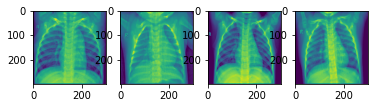

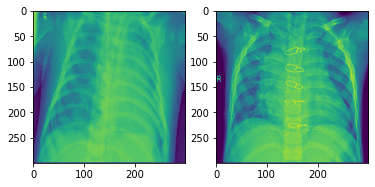

In [49]:
# TODO: YOUR CODE AND YOUR ANSWER
predictions = clf.predict(testing_data)
normal_predictions = predictions[0:TESTING_COUNT]
pneumonia_predictions = predictions[TESTING_COUNT:TESTING_COUNT*2]

plt.figure()
f, axarrn = plt.subplots(1, 4)
f, axarrp = plt.subplots(1, 2)

a = 0
b = 0

print("4 misclassified normal images (TOP)")
print("2 misclassified pneumonia images (BOTTOM)")


for i in range(TESTING_COUNT):
  if (normal_predictions[i] != 0):
    axarrn[a].imshow(normal_images[i])
    a += 1
  if (pneumonia_predictions[i] != 1):
    axarrp[b].imshow(pneumonia_images[i])
    b += 1



"""
I think the reason as to why these images were problematic was because perhaps
due to their overall shape, I noticed how the pneumonia ribcage is significantly
narrower when compared to the other images. The quality of the second normal 
image is poor and looks like one of the pneumonia images as well. In summary
it may be due to image quality and image variance. 
"""

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER
"""
We can improve the preformance by preprocessing the images
to better suit our needs as to what we are looking for in
paticular. For example if we want to ignore the rib cage
and bones and only focus on the lungs we can probably shift
the pixel intensity distribution.
"""

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw